# Chapter 9

## Section 9.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_summarized_orders = pd.read_pickle(
                          'Chapter 5/summarized_orders.pickle')
df_orders = pd.read_pickle('Chapter 7/orders.pickle')

## Section 9.3

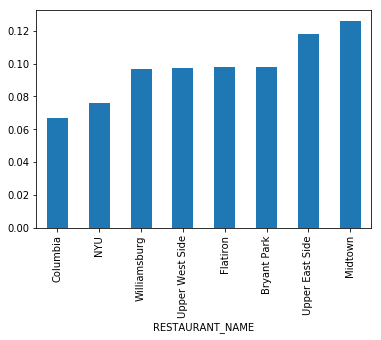

In [3]:
( df_orders.groupby('RESTAURANT_NAME').DRINKS
                    .mean().sort_values().plot(kind='bar') )

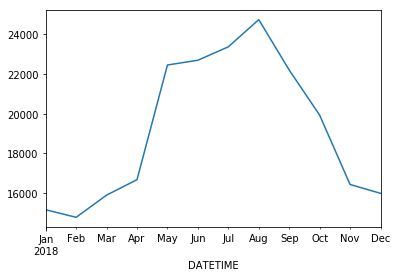

In [4]:
( df_orders.set_index('DATETIME').resample('M')
                               .DRINKS.sum().plot() )

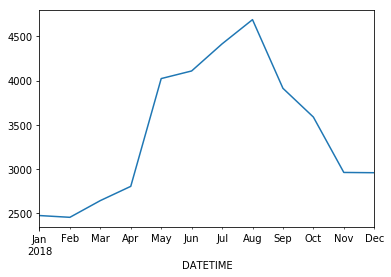

In [5]:
( df_orders[df_orders.RESTAURANT_NAME == 'Midtown']
           .set_index('DATETIME')
           .resample('M')
           .DRINKS.sum().plot() )

## Section 9.4

In [6]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


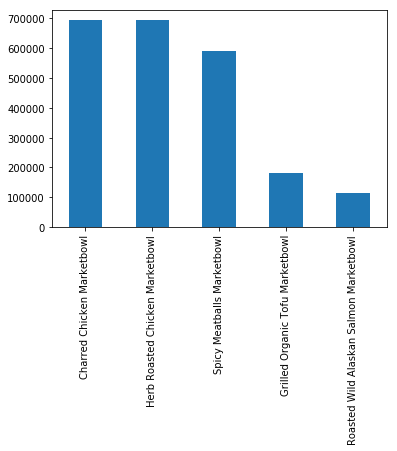

In [7]:
df_orders.MAIN_NAME.value_counts().plot(kind='bar')

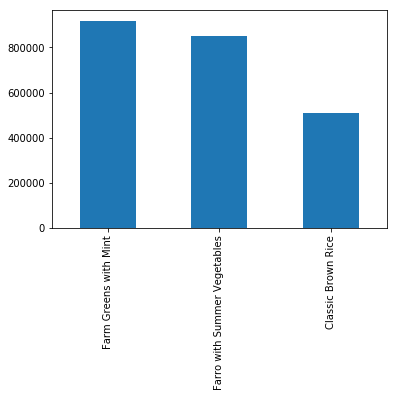

In [8]:
df_orders.BASE_NAME.value_counts().plot(kind='bar')

In [9]:
( df_orders.groupby(['MAIN_NAME', 'BASE_NAME'])
           .size()
           .sort_values(ascending=False)
           .reset_index() )

,MAIN_NAME,BASE_NAME,0
0,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,280243
1,Charred Chicken Marketbowl,Farm Greens with Mint,279591
2,Herb Roasted Chicken Marketbowl,Farro with Summer Vegetables,259056
3,Charred Chicken Marketbowl,Farro with Summer Vegetables,258945
4,Spicy Meatballs Marketbowl,Farm Greens with Mint,238509
5,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,220116
6,Charred Chicken Marketbowl,Classic Brown Rice,155311
7,Herb Roasted Chicken Marketbowl,Classic Brown Rice,154203
8,Spicy Meatballs Marketbowl,Classic Brown Rice,132060
9,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,73682


In [10]:
( df_orders.groupby(['MAIN_NAME', 'BASE_NAME'])
           .size()
           .unstack() )

BASE_NAME,Classic Brown Rice,Farm Greens with Mint,Farro with Summer Vegetables
MAIN_NAME,,,
Charred Chicken Marketbowl,155311,279591,258945
Grilled Organic Tofu Marketbowl,41323,73682,68153
Herb Roasted Chicken Marketbowl,154203,280243,259056
Roasted Wild Alaskan Salmon Marketbowl,25616,46052,42779
Spicy Meatballs Marketbowl,132060,238509,220116


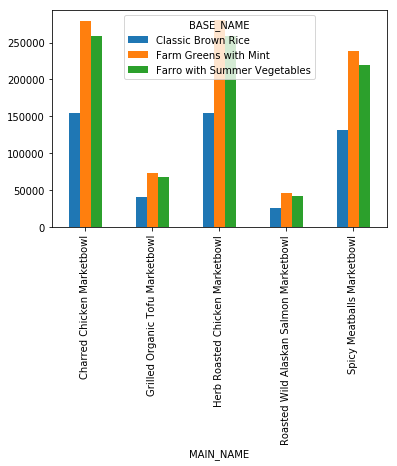

In [11]:
( df_orders.groupby(['MAIN_NAME', 'BASE_NAME'])
           .size()
           .unstack()
           .plot(kind='bar') )

## Section 9.5

In [12]:
( df_orders.groupby([df_orders.DATETIME.dt.hour,
                     df_orders.RESTAURANT_NAME])
           .size() )

DATETIME  RESTAURANT_NAME
9         Columbia             2
          Flatiron             2
          Midtown              3
          NYU                  5
          Upper East Side      1
                            ... 
23        Midtown             97
          NYU                149
          Upper East Side     94
          Upper West Side     96
          Williamsburg       107
Length: 118, dtype: int64

In [13]:
( df_orders.groupby([df_orders.DATETIME.dt.hour,
                     df_orders.RESTAURANT_NAME])
           .size()
           .unstack() )

RESTAURANT_NAME,Bryant Park,Columbia,Flatiron,Midtown,NYU,Upper East Side,Upper West Side,Williamsburg
DATETIME,,,,,,,,
9,NaN,2.0,2.0,3.0,5.0,1.0,NaN,2.0
10,5581.0,7035.0,6927.0,8106.0,3756.0,2306.0,2374.0,2715.0
11,22289.0,9698.0,27094.0,31643.0,35330.0,22564.0,23237.0,25502.0
12,31444.0,10008.0,37918.0,44244.0,56872.0,36402.0,37286.0,41518.0
13,31442.0,12872.0,38091.0,44724.0,54048.0,34428.0,35695.0,39481.0
14,26484.0,15341.0,32899.0,38184.0,39774.0,25547.0,26172.0,29196.0
15,18848.0,16667.0,23772.0,27537.0,28455.0,17947.0,18141.0,20496.0
16,16577.0,17859.0,20724.0,24132.0,29695.0,19126.0,19303.0,21941.0
17,15844.0,22412.0,19874.0,23185.0,38183.0,24224.0,24658.0,27857.0


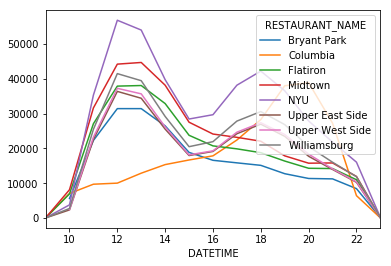

In [14]:
( df_orders.groupby([df_orders.DATETIME.dt.hour,
                     df_orders.RESTAURANT_NAME])
           .size()
           .unstack()
           .plot() )

## Section 9.6

In [15]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


In [16]:
df_num_orders = ( df_orders.set_index('DATETIME')
                           .groupby('RESTAURANT_NAME')
                           .resample('D')
                           .size()
                           .reset_index()
                           .rename(columns={0:'NUM_ORDERS'}) )
print(len(df_num_orders))
df_num_orders.head()

2919


,RESTAURANT_NAME,DATETIME,NUM_ORDERS
0,Bryant Park,2018-01-01,373
1,Bryant Park,2018-01-02,789
2,Bryant Park,2018-01-03,818
3,Bryant Park,2018-01-04,782
4,Bryant Park,2018-01-05,719


In [17]:
df_orders['IS_DELIVERY'] = (df_orders.TYPE == 'DELIVERY')
df_pct_delivery = ( df_orders.set_index('DATETIME')
                        .groupby('RESTAURANT_NAME')
                        .resample('D')
                        .IS_DELIVERY
                        .mean()
                        .reset_index()
                        .rename(columns={'IS_DELIVERY':
                                            'PCT_DELIVERY'}) )
print(len(df_pct_delivery))
df_pct_delivery.head()

2919


,RESTAURANT_NAME,DATETIME,PCT_DELIVERY
0,Bryant Park,2018-01-01,0.0
1,Bryant Park,2018-01-02,0.0
2,Bryant Park,2018-01-03,0.0
3,Bryant Park,2018-01-04,0.0
4,Bryant Park,2018-01-05,0.0


In [18]:
df_summarized_orders = (
        pd.merge(df_num_orders,
                  df_pct_delivery,
                  on=['RESTAURANT_NAME', 'DATETIME'],
                  how='outer') )
print(len(df_summarized_orders))
df_summarized_orders.head()

2919


,RESTAURANT_NAME,DATETIME,NUM_ORDERS,PCT_DELIVERY
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0


In [19]:
(df_summarized_orders.NUM_ORDERS > 0).sum()

2806

In [20]:
df_orders.shape

(2387224, 16)

## Section 9.7

In [21]:
( df_orders[df_orders.RESTAURANT_NAME == 'Columbia']
            .TYPE.value_counts(normalize=True).reset_index() )

,index,TYPE
0,IN_STORE,0.728053
1,PICKUP,0.171285
2,DELIVERY,0.100662


In [22]:
# Alternative method to produce our table of data
# -----------------------------------------------

# Begin by getting a list of unique order types
order_types = df_orders.TYPE.unique().tolist()

# Create one column in df_orders for every order type
# equal to 1 if that row is of that order type, and
# 0 otherwise
for i in order_types:
    df_orders[i] = (df_orders.TYPE == i)

# Group by RESTAURANT_NAME, and find the average of each
# order type column - this will give us the table we
# need
    
modality_props = (df_orders.groupby('RESTAURANT_NAME')
                                     [order_types].mean() )

modality_props

,IN_STORE,DELIVERY,PICKUP
RESTAURANT_NAME,,,
Bryant Park,0.754002,0.068645,0.177353
Columbia,0.728053,0.100662,0.171285
Flatiron,0.725600,0.102343,0.172056
Midtown,0.753170,0.068805,0.178024
NYU,0.730706,0.100520,0.168774
Upper East Side,0.656743,0.189381,0.153876
Upper West Side,0.656462,0.189686,0.153852
Williamsburg,0.729094,0.101127,0.169779


In [23]:
( df_orders.groupby('RESTAURANT_NAME')
           .TYPE
           .value_counts(normalize=True)
           .head(10) )

RESTAURANT_NAME  TYPE    
Bryant Park      IN_STORE    0.754002
                 PICKUP      0.177353
                 DELIVERY    0.068645
Columbia         IN_STORE    0.728053
                 PICKUP      0.171285
                 DELIVERY    0.100662
Flatiron         IN_STORE    0.725600
                 PICKUP      0.172056
                 DELIVERY    0.102343
Midtown          IN_STORE    0.753170
Name: TYPE, dtype: float64

In [24]:
( df_orders.groupby('RESTAURANT_NAME')
           .TYPE
           .value_counts(normalize=True)
           .unstack() )

TYPE,DELIVERY,IN_STORE,PICKUP
RESTAURANT_NAME,,,
Bryant Park,0.068645,0.754002,0.177353
Columbia,0.100662,0.728053,0.171285
Flatiron,0.102343,0.725600,0.172056
Midtown,0.068805,0.753170,0.178024
NYU,0.100520,0.730706,0.168774
Upper East Side,0.189381,0.656743,0.153876
Upper West Side,0.189686,0.656462,0.153852
Williamsburg,0.101127,0.729094,0.169779


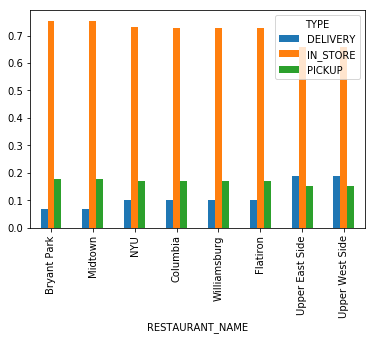

In [25]:
( df_orders.groupby('RESTAURANT_NAME')
           .TYPE
           .value_counts(normalize=True)
           .unstack()
           .sort_values('DELIVERY')
           .plot(kind='bar') )

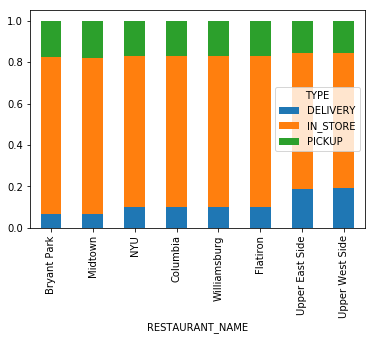

In [26]:
( df_orders.groupby('RESTAURANT_NAME')
           .TYPE
           .value_counts(normalize=True)
           .unstack()
           .sort_values('DELIVERY')
           .plot(kind='bar', stacked=True) )

## Section 9.8

In [27]:
df_orders.BASE_NAME.value_counts()

Farm Greens with Mint           918077
Farro with Summer Vegetables    849049
Classic Brown Rice              508513
Name: BASE_NAME, dtype: int64

In [28]:
salad = 'Farm Greens with Mint'

In [29]:
print(df_orders[df_orders.BASE_NAME != salad].COOKIES.mean())
print(df_orders[df_orders.BASE_NAME == salad].COOKIES.mean())

0.3664534590480054
0.08817561054247083


In [30]:
df_orders.groupby(df_orders.BASE_NAME == salad).COOKIES.mean()

BASE_NAME
False    0.366453
True     0.088176
Name: COOKIES, dtype: float64

In [31]:
from scipy import stats
stats.ttest_ind(df_orders[df_orders.BASE_NAME!=salad].COOKIES,
                df_orders[df_orders.BASE_NAME==salad].COOKIES)

Ttest_indResult(statistic=386.1313807565163, pvalue=0.0)

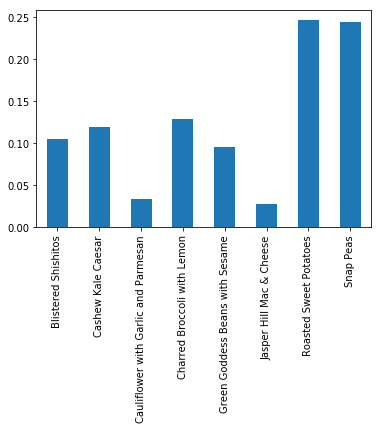

In [32]:
( df_orders[df_orders.BASE_NAME == salad]
           .SIDE_1_NAME
           .value_counts(normalize=True)
           .sort_index()
           .plot(kind='bar') )

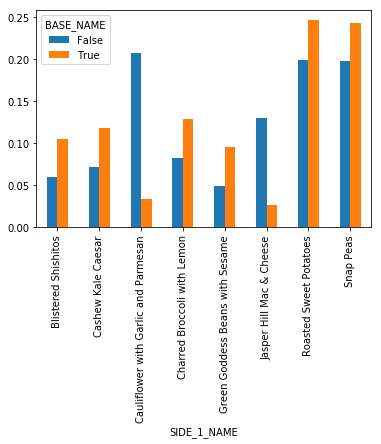

In [33]:
( df_orders
    .groupby( df_orders.BASE_NAME == salad )
    .SIDE_1_NAME
    .value_counts(normalize=True)
    .unstack(level=0)
    .plot(kind='bar') )

In [34]:
( df_orders
    .groupby( df_orders.BASE_NAME == salad )
    .SIDE_1_NAME
    .value_counts(normalize=True))

BASE_NAME  SIDE_1_NAME                         
False      Cauliflower with Garlic and Parmesan    0.208072
           Roasted Sweet Potatoes                  0.199584
           Snap Peas                               0.198432
           Jasper Hill Mac & Cheese                0.130618
           Charred Broccoli with Lemon             0.082552
           Cashew Kale Caesar                      0.072204
           Blistered Shishitos                     0.059304
           Green Goddess Beans with Sesame         0.049233
True       Roasted Sweet Potatoes                  0.246699
           Snap Peas                               0.243838
           Charred Broccoli with Lemon             0.128652
           Cashew Kale Caesar                      0.118749
           Blistered Shishitos                     0.105016
           Green Goddess Beans with Sesame         0.095873
           Cauliflower with Garlic and Parmesan    0.034135
           Jasper Hill Mac & Cheese                0

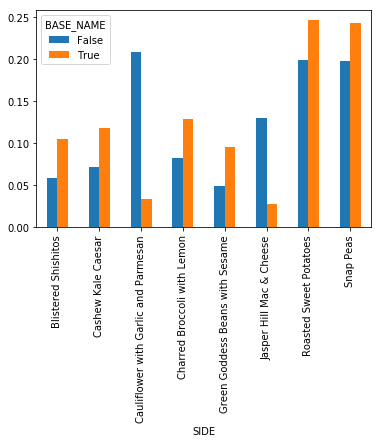

In [35]:
combined_sides = pd.concat(
     [df_orders[['BASE_NAME', 'SIDE_1_NAME']]
            .rename(columns={'SIDE_1_NAME':'SIDE'}),
     df_orders[['BASE_NAME', 'SIDE_2_NAME']]
            .rename(columns={'SIDE_2_NAME':'SIDE'})] )

( combined_sides
    .groupby( combined_sides.BASE_NAME == salad )
    .SIDE
    .value_counts(normalize=True)
    .unstack(level=0)
    .plot(kind='bar') )

## Section 9.9

In [36]:
df_weather = pd.read_csv('raw data/weather.csv')
df_weather.DATETIME = pd.to_datetime(df_weather.DATETIME)
df_weather.head()

,DATETIME,TEMPERATURE,PRECIP
0,2018-01-01 00:00:00,9.66,0.0
1,2018-01-01 01:00:00,9.19,0.0
2,2018-01-01 02:00:00,9.04,0.0
3,2018-01-01 03:00:00,8.37,0.0
4,2018-01-01 04:00:00,8.14,0.0


In [37]:
df_num_orders = ( df_orders.set_index('DATETIME')
                           .resample('H')
                           .size()
                           .reset_index()
                           .rename(columns={0:'NUM_ORDERS'}) )

In [38]:
df_av_drinks = ( df_orders.set_index('DATETIME')
                          .resample('H')
                          .DRINKS
                          .mean()
                          .reset_index() )

In [39]:
df_orders['IS_DELIVERY'] = (df_orders.TYPE == 'DELIVERY')
df_pct_delivery = ( df_orders.set_index('DATETIME')
                             .resample('H')
                             .IS_DELIVERY
                             .mean()
                             .reset_index() )

In [40]:
df_combined = pd.merge(df_num_orders, df_av_drinks,
                        on='DATETIME', how='outer')

df_combined = pd.merge(df_combined, df_pct_delivery,
                        on='DATETIME', how='outer')

In [41]:
df_combined = df_combined[df_combined.NUM_ORDERS > 0]

In [42]:
df_combined.head()

,DATETIME,NUM_ORDERS,DRINKS,IS_DELIVERY
0,2018-01-01 10:00:00,80,0.037500,0.175000
1,2018-01-01 11:00:00,359,0.083565,0.178273
2,2018-01-01 12:00:00,526,0.043726,0.188213
3,2018-01-01 13:00:00,553,0.072333,0.169982
4,2018-01-01 14:00:00,407,0.044226,0.167076


In [43]:
df_combined = pd.merge(df_combined, df_weather,
                    on='DATETIME', how='left')
df_combined.head()

,DATETIME,NUM_ORDERS,DRINKS,IS_DELIVERY,TEMPERATURE,PRECIP
0,2018-01-01 10:00:00,80,0.037500,0.175000,11.14,0.0
1,2018-01-01 11:00:00,359,0.083565,0.178273,13.05,0.0
2,2018-01-01 12:00:00,526,0.043726,0.188213,14.41,0.0
3,2018-01-01 13:00:00,553,0.072333,0.169982,16.18,0.0
4,2018-01-01 14:00:00,407,0.044226,0.167076,17.29,0.0


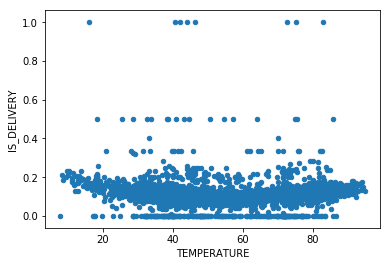

In [44]:
df_combined.plot(x='TEMPERATURE', y='IS_DELIVERY',
                                         kind='scatter')

In [45]:
((df_combined.TEMPERATURE/10).round()*10).head()

0    10.0
1    10.0
2    10.0
3    20.0
4    20.0
Name: TEMPERATURE, dtype: float64

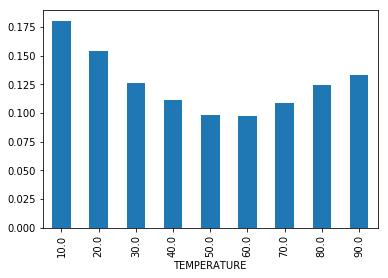

In [46]:
( df_combined
    .groupby((df_combined.TEMPERATURE/10).round()*10)
    .IS_DELIVERY
    .mean()
    .plot(kind='bar') )

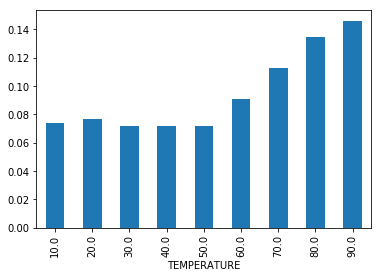

In [47]:
( df_combined
    .groupby((df_combined.TEMPERATURE/10).round()*10)
    .DRINKS
    .mean()
    .plot(kind='bar') )